In [2]:
import atomica as at
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import hbv_functions as hbv

In [19]:
%matplotlib inline 

In [5]:
F = at.ProjectFramework('frameworks/hbv_v14_gamma_mav.xlsx')
D = at.ProjectData.from_spreadsheet(f"applications/region_emr/EMR_db_mav.xlsx", framework=F)
P = at.Project(framework=F, databook=D, sim_dt=0.25, sim_start=1990, sim_end=2099, do_run=False)
cal = P.make_parset()
cal.load_calibration('applications/region_emr/EMR_calib.xlsx')

C:\Users\iamph\Miniconda3\lib\site-packages\atomica\framework.py:914: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for to_comp, par_names in from_row.iteritems():


In [12]:
res0 = P.run_sim(parset=cal,result_name = 'basebase')

Elapsed time for running "default": 3.58s


In [10]:
scen = at.ParameterScenario(name='No Vaccinations')
for pop in ['0-4M', '0-4F']:
    for char in ['hb3', 'bd']:
        scen.add(char, pop, [1990], [0])
res = scen.run(P,cal)
d = at.PlotData([P.results[0],res],'hb3', pop = '0-4M')
at.plot_series(d,data=P.data,axis=f'result');

TypeError: Scenario.run() got an unexpected keyword argument 'result_name'

In [9]:
scen = at.ParameterScenario(name='No Vaccinations')
for pop in ['0-4M', '0-4F']:
    for char in ['hb3', 'bd']:
        scen.add(char, pop, [1990], [0])
res = scen.run(P,cal)

Elapsed time for running "default": 3.27s


[<Figure size 640x480 with 1 Axes>, <Figure size 640x480 with 1 Axes>]

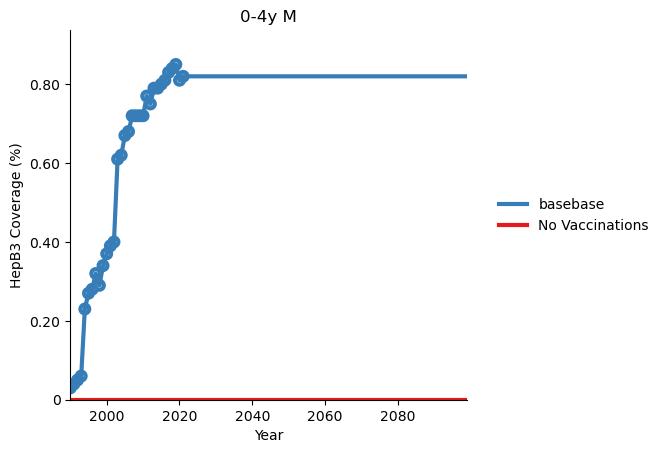

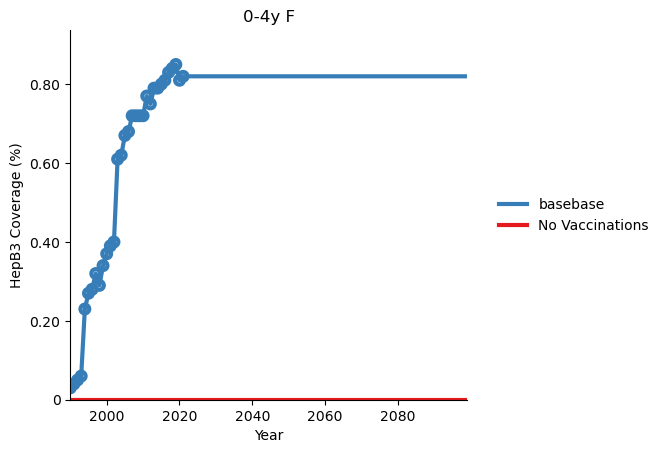

In [22]:
d = at.PlotData([res0, res], outputs=f'hb3', project=P, pops = ['0-4M', '0-4F'])
at.plot_series(d,axis='results',data=P.data)

### THIS WORKS!!!! 

TODO: 
- Turn this into a function (for both vaccination and treatment)
- Do the same thing except with a progbook